In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/

In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import os

img = cv2.imread('C:\\Users\\Home\\OneDrive\\Desktop\\fish dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\train\\animal fish\\0E5J7IQQB414.jpg')

h, w, c = img.shape
print(f"Height: {h}, Width: {w}, Channels: {c}")

Height: 256, Width: 256, Channels: 3


In [4]:
#Load and Preprocess Data
# Data Augmentation for Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
 #Only rescaling for Validation and Testing
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'C:\\Users\\Home\\OneDrive\\Desktop\\fish dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
     color_mode='rgb' 
)

val_gen = val_datagen.flow_from_directory(
    'C:\\Users\\Home\\OneDrive\\Desktop\\fish dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
     color_mode='rgb' 
)

test_gen = test_datagen.flow_from_directory(
    'C:\\Users\\Home\\OneDrive\\Desktop\\fish dataset\\images.cv_jzk6llhf18tm3k0kyttxz\\data\\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
     color_mode='rgb' 
)

num_classes = len(train_gen.class_indices)
print(train_gen.num_classes)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
11


In [8]:
display(train_gen.class_indices)
display(val_gen.class_indices)
display(test_gen.class_indices)

{'animal fish': 0,
 'animal fish bass': 1,
 'fish sea_food black_sea_sprat': 2,
 'fish sea_food gilt_head_bream': 3,
 'fish sea_food hourse_mackerel': 4,
 'fish sea_food red_mullet': 5,
 'fish sea_food red_sea_bream': 6,
 'fish sea_food sea_bass': 7,
 'fish sea_food shrimp': 8,
 'fish sea_food striped_red_mullet': 9,
 'fish sea_food trout': 10}

{'animal fish': 0,
 'animal fish bass': 1,
 'fish sea_food black_sea_sprat': 2,
 'fish sea_food gilt_head_bream': 3,
 'fish sea_food hourse_mackerel': 4,
 'fish sea_food red_mullet': 5,
 'fish sea_food red_sea_bream': 6,
 'fish sea_food sea_bass': 7,
 'fish sea_food shrimp': 8,
 'fish sea_food striped_red_mullet': 9,
 'fish sea_food trout': 10}

{'animal fish': 0,
 'animal fish bass': 1,
 'fish sea_food black_sea_sprat': 2,
 'fish sea_food gilt_head_bream': 3,
 'fish sea_food hourse_mackerel': 4,
 'fish sea_food red_mullet': 5,
 'fish sea_food red_sea_bream': 6,
 'fish sea_food sea_bass': 7,
 'fish sea_food shrimp': 8,
 'fish sea_food striped_red_mullet': 9,
 'fish sea_food trout': 10}

In [ ]:
#CNN Model from Scratch



cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(train_gen, validation_data=val_gen, epochs=100)
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
cnn_model.save('cnn_scratch.h5')



c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 5885s 30s/step - accuracy: 0.5027 - loss: 1.4338 - val_accuracy: 0.7289 - val_loss: 0.8111
Epoch 2/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.7462 - loss: 0.7158 - val_accuracy: 0.7848 - val_loss: 0.6535
Epoch 3/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 274s 1s/step - accuracy: 0.8299 - loss: 0.4820 - val_accuracy: 0.8965 - val_loss: 0.3287
Epoch 4/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.8935 - loss: 0.3169 - val_accuracy: 0.9130 - val_loss: 0.2561
Epoch 5/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9179 - loss: 0.2470 - val_accuracy: 0.9258 - val_loss: 0.2279
Epoch 6/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 634s 3s/step - accuracy: 0.9433 - loss: 0.1662 - val_accuracy: 0.9405 - val_loss: 0.2309
Epoch 7/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.9335 - loss: 0.2026 - val_accuracy: 0.9625 - val_loss: 0.1852
Epoch 8/100
195/195 ━━━━━━━━━━━━━━━━━━━━ 392s 2s/step - accuracy: 0.9420 - loss: 0.1690 

In [7]:
loss, acc = cnn_model.evaluate(val_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 13s 358ms/step - accuracy: 0.9918 - loss: 0.1563
Validation Loss: 0.1563
Validation Accuracy: 0.9918


In [8]:
loss, acc = cnn_model.evaluate(train_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")

195/195 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.9992 - loss: 0.0030
Validation Loss: 0.0030
Validation Accuracy: 0.9992


In [2]:
pretrained_model1 = tf.keras.applications.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model1.trainable = False

In [14]:
inputs = pretrained_model1.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model1.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=30)
callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,377,995 (12.89 MB)

 Trainable params: 2,280,587 (8.70 MB)

 Non-trainable params: 1,097,408 (4.19 MB)

Epoch 1/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.9888 - loss: 0.0515 - val_accuracy: 0.9899 - val_loss: 0.0357
Epoch 2/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9987 - loss: 0.0059 - val_accuracy: 0.9973 - val_loss: 0.0239
Epoch 3/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 17871s 92s/step - accuracy: 0.9921 - loss: 0.0371 - val_accuracy: 0.9945 - val_loss: 0.0741
Epoch 4/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 367s 2s/step - accuracy: 0.9987 - loss: 0.0080 - val_accuracy: 0.9982 - val_loss: 0.0198
Epoch 5/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 289s 1s/step - accuracy: 0.9916 - loss: 0.0379 - val_accuracy: 0.9908 - val_loss: 0.0549
Epoch 6/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 29526s 152s/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9954 - val_loss: 0.0257
Epoch 7/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.9969 - loss: 0.0174 - val_accuracy: 0.9936 - val_loss: 0.0362
Epoch 8/30
195/195 ━━━━━━━━━━━━━━━━━━━━ 1545s 8s/step - accuracy: 0.9961 - loss: 0.0167 - 

In [16]:
#Fine tuning:
pretrained_model1.trainable=True
# Unfreeze last 30% layers
fine_tune_at = int(0.7 * len(pretrained_model1.layers))
for layer in pretrained_model1.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=20,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)])
model.save('mobilenet_finetuned.h5')

Epoch 1/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 144s 720ms/step - accuracy: 0.9987 - loss: 0.0039 - val_accuracy: 0.9973 - val_loss: 0.0138
Epoch 2/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9973 - val_loss: 0.0188
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 184s 943ms/step - accuracy: 0.9998 - loss: 5.7271e-04 - val_accuracy: 0.9973 - val_loss: 0.0114
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 179s 918ms/step - accuracy: 0.9998 - loss: 4.6003e-04 - val_accuracy: 0.9973 - val_loss: 0.0075
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 160s 821ms/step - accuracy: 0.9995 - loss: 6.3063e-04 - val_accuracy: 0.9982 - val_loss: 0.0038
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1130s 6s/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9982 - val_loss: 0.0058
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 137s 700ms/step - accuracy: 0.9997 - loss: 0.0015 - val_accuracy: 0.9982 - val_loss: 0.0066
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 156s 799ms/step - accuracy: 0

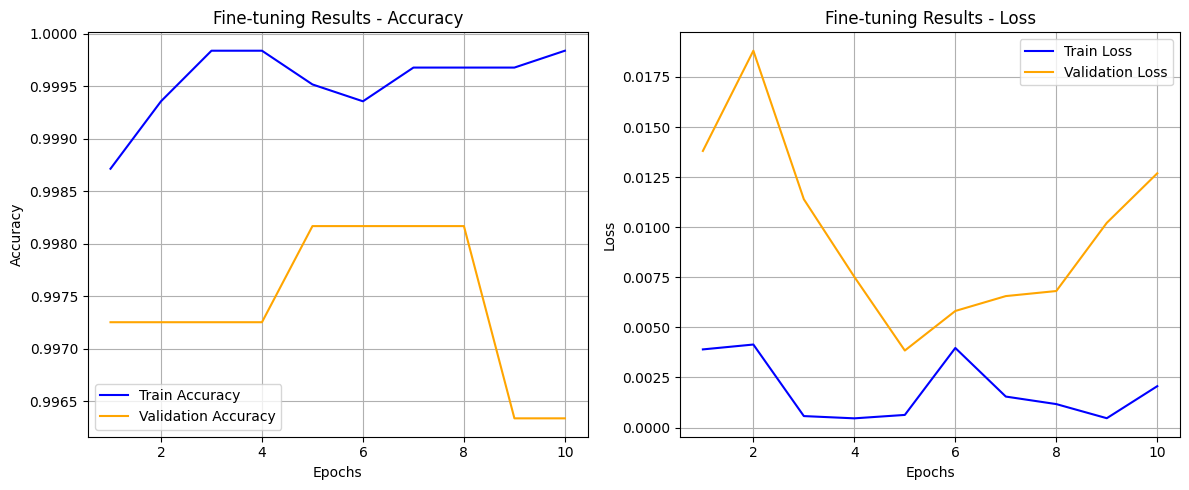

In [19]:
# Extract metrics from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Create subplots
plt.figure(figsize=(12, 5))

# --- Accuracy subplot ---
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Train Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
plt.title('Fine-tuning Results - Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss subplot ---
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Train Loss')
plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
plt.title('Fine-tuning Results - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 282ms/step


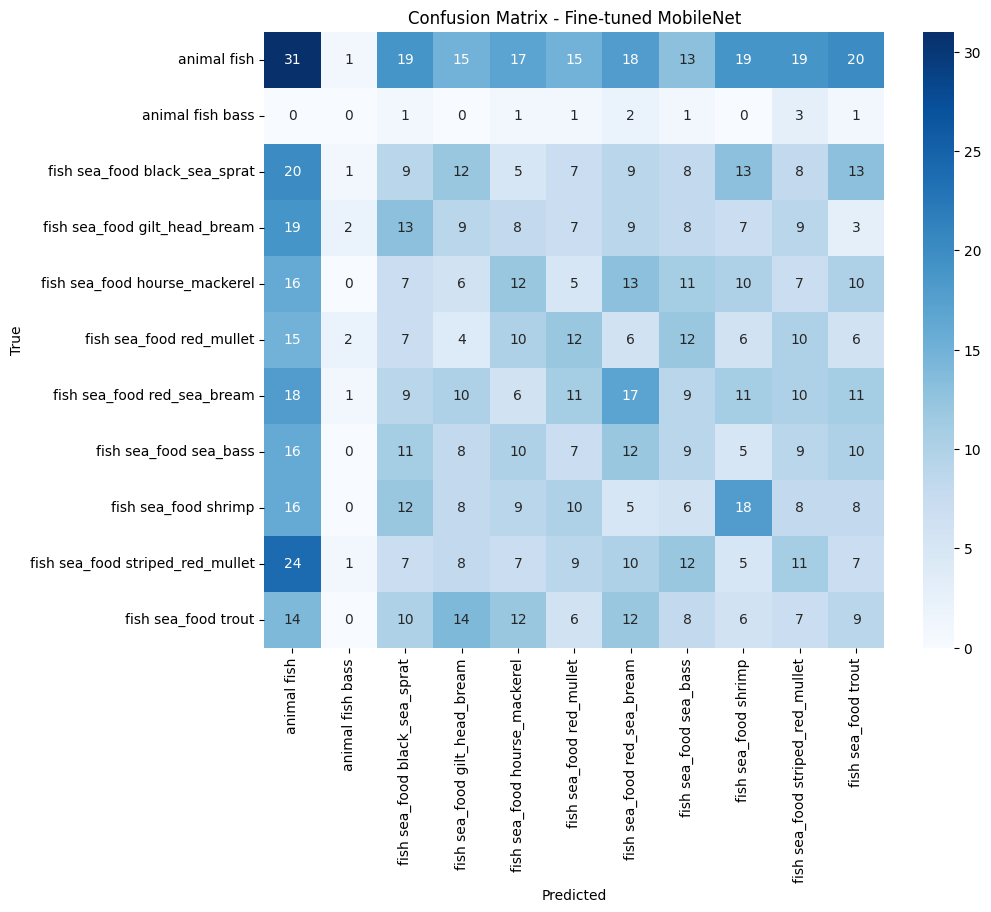

Classification Report:

                                  precision    recall  f1-score   support

                     animal fish       0.16      0.17      0.16       187
                animal fish bass       0.00      0.00      0.00        10
   fish sea_food black_sea_sprat       0.09      0.09      0.09       105
   fish sea_food gilt_head_bream       0.10      0.10      0.10        94
   fish sea_food hourse_mackerel       0.12      0.12      0.12        97
        fish sea_food red_mullet       0.13      0.13      0.13        90
     fish sea_food red_sea_bream       0.15      0.15      0.15       113
          fish sea_food sea_bass       0.09      0.09      0.09        97
            fish sea_food shrimp       0.18      0.18      0.18       100
fish sea_food striped_red_mullet       0.11      0.11      0.11       101
             fish sea_food trout       0.09      0.09      0.09        98

                        accuracy                           0.13      1092
            

In [ ]:
true_labels = val_gen.classes  # actual class indices

#  Step 2: Get predicted probabilities
pred_probs = model.predict(val_gen)
pred_labels = np.argmax(pred_probs, axis=1)

# step 3: Get class names from generator
class_names = list(val_gen.class_indices.keys())

# Step 4: Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix - Fine-tuned MobileNet')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#Step 5: Classification Report
print("Classification Report:\n")
print(classification_report(true_labels, pred_labels, target_names=class_names))


In [ ]:
pretrained_model2= tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model2.trainable = False

In [55]:
inputs = pretrained_model2.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model2.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=5)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_12     │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 11)             │         1,419 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,798,283 (56.45 MB)

 Trainable params: 83,595 (326.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1008s 5s/step - accuracy: 0.5449 - loss: 1.4242 - val_accuracy: 0.7848 - val_loss: 0.7807
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1284s 7s/step - accuracy: 0.8151 - loss: 0.6049 - val_accuracy: 0.8929 - val_loss: 0.4040
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1533s 8s/step - accuracy: 0.8794 - loss: 0.3846 - val_accuracy: 0.8516 - val_loss: 0.3980
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 975s 5s/step - accuracy: 0.9110 - loss: 0.2861 - val_accuracy: 0.9359 - val_loss: 0.2307
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 984s 5s/step - accuracy: 0.9253 - loss: 0.2353 - val_accuracy: 0.9148 - val_loss: 0.2441


In [16]:
pretrained_model3= tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model3.trainable = False


In [15]:
inputs = pretrained_model3.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=5)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,867,915 (91.05 MB)

 Trainable params: 280,203 (1.07 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.1855 - loss: 2.2189 - val_accuracy: 0.2353 - val_loss: 2.0894
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1072s 6s/step - accuracy: 0.2524 - loss: 2.0195 - val_accuracy: 0.2582 - val_loss: 1.9329
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 956s 5s/step - accuracy: 0.2954 - loss: 1.9032 - val_accuracy: 0.2949 - val_loss: 1.8752
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 749s 4s/step - accuracy: 0.3234 - loss: 1.8316 - val_accuracy: 0.4222 - val_loss: 1.7439
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 877s 4s/step - accuracy: 0.3488 - loss: 1.7651 - val_accuracy: 0.4029 - val_loss: 1.6877


In [15]:
pretrained_model4= tf.keras.applications.InceptionV3(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model4.trainable = False

In [28]:
inputs = pretrained_model4.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=5)

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 111, 111,  │        864 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_9     │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_9[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_13[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 22,082,987 (84.24 MB)

 Trainable params: 280,203 (1.07 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 568s 3s/step - accuracy: 0.8447 - loss: 0.4822 - val_accuracy: 0.9396 - val_loss: 0.1727
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.9462 - loss: 0.1596 - val_accuracy: 0.9423 - val_loss: 0.1687
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 665s 3s/step - accuracy: 0.9524 - loss: 0.1348 - val_accuracy: 0.9588 - val_loss: 0.1160
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 20019s 103s/step - accuracy: 0.9602 - loss: 0.1135 - val_accuracy: 0.9670 - val_loss: 0.0809
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.9712 - loss: 0.0820 - val_accuracy: 0.9698 - val_loss: 0.0858


In [4]:
pretrained_model5= tf.keras.applications.DenseNet121(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'

)
pretrained_model5.trainable = False

In [7]:
inputs = pretrained_model5.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model5.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=5)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,186,635 (27.41 MB)

 Trainable params: 149,131 (582.54 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

c:\Users\Home\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1192s 6s/step - accuracy: 0.8761 - loss: 0.4409 - val_accuracy: 0.9826 - val_loss: 0.0761
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 646s 3s/step - accuracy: 0.9812 - loss: 0.0689 - val_accuracy: 0.9872 - val_loss: 0.0464
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 1274s 7s/step - accuracy: 0.9863 - loss: 0.0437 - val_accuracy: 0.9890 - val_loss: 0.0411
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - accuracy: 0.9884 - loss: 0.0384 - val_accuracy: 0.9918 - val_loss: 0.0354
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9902 - loss: 0.0282 - val_accuracy: 0.9533 - val_loss: 0.1253
